In [33]:
# Install necessary libraries
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install folium
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Import warnings module to suppress warnings
import warnings

# Ignore warnings of the category FutureWarning
# FutureWarning is a category of warning that indicates that a certain feature or behavior will change in future versions of the library
warnings.simplefilter(action='ignore', category=FutureWarning)

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


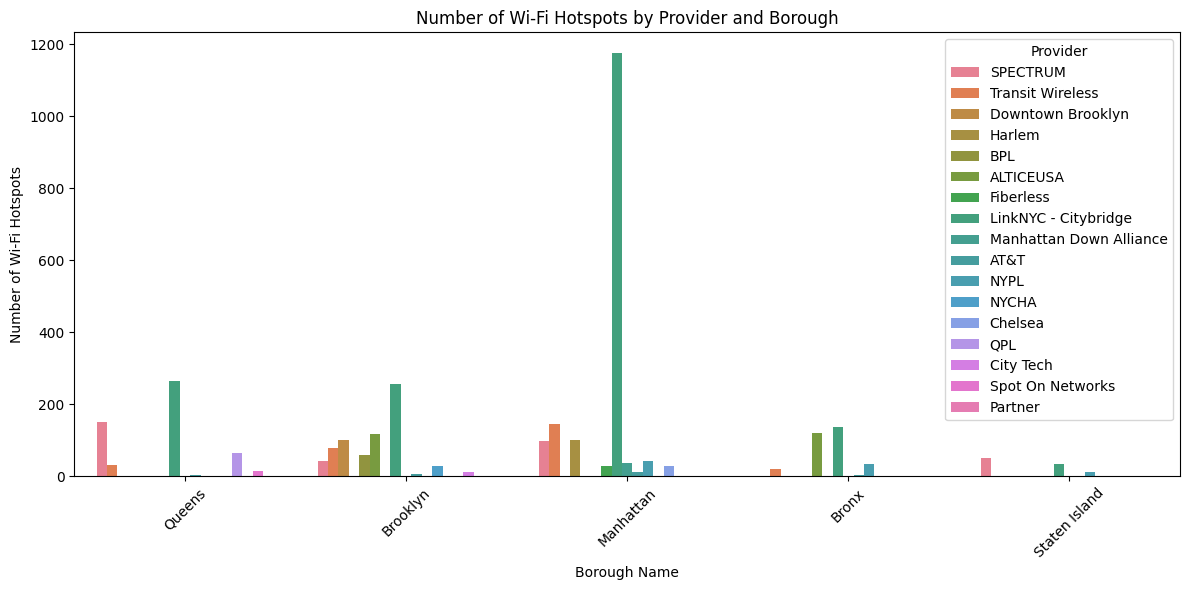

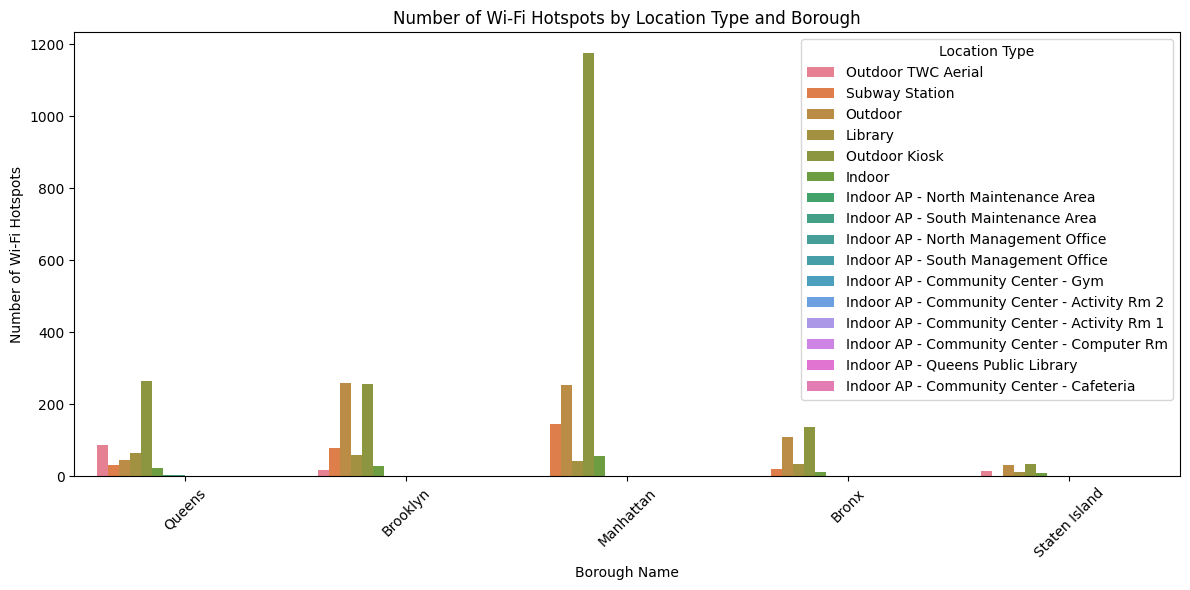

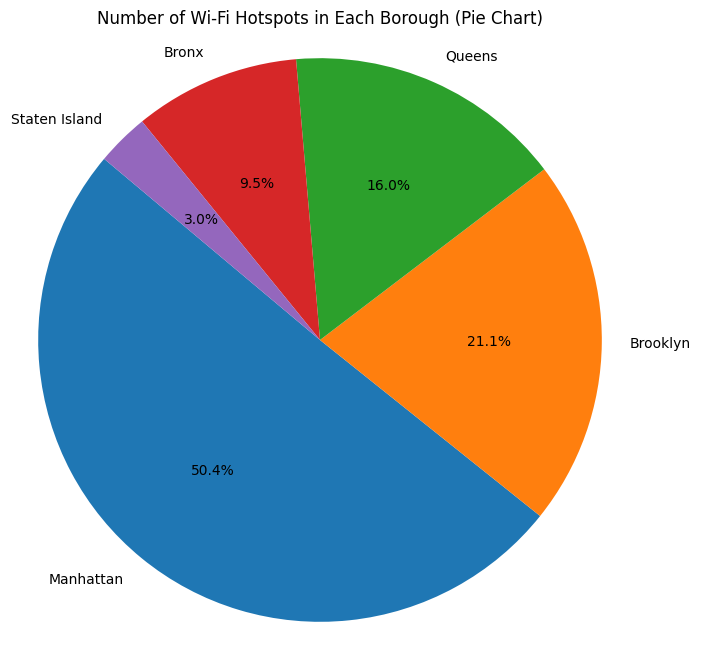

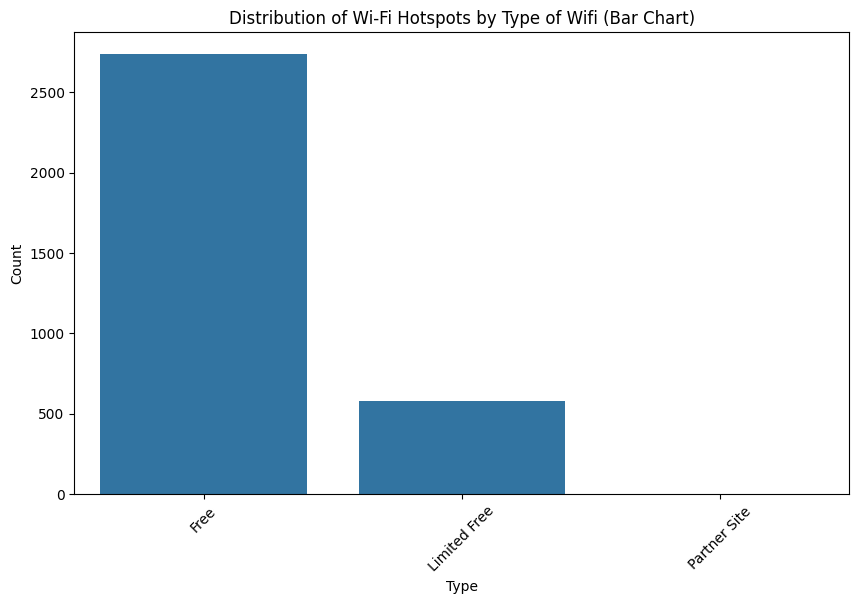

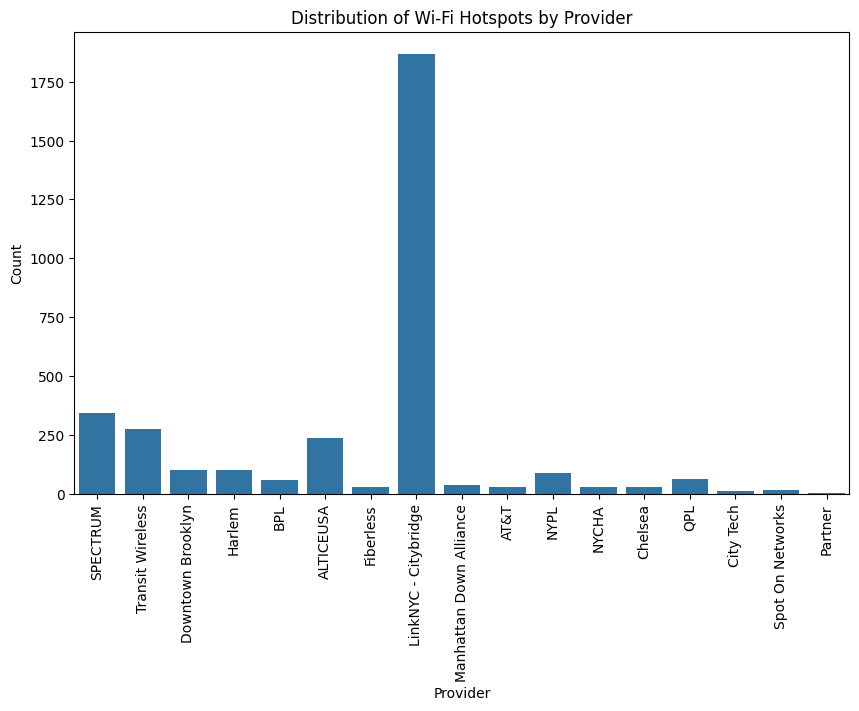

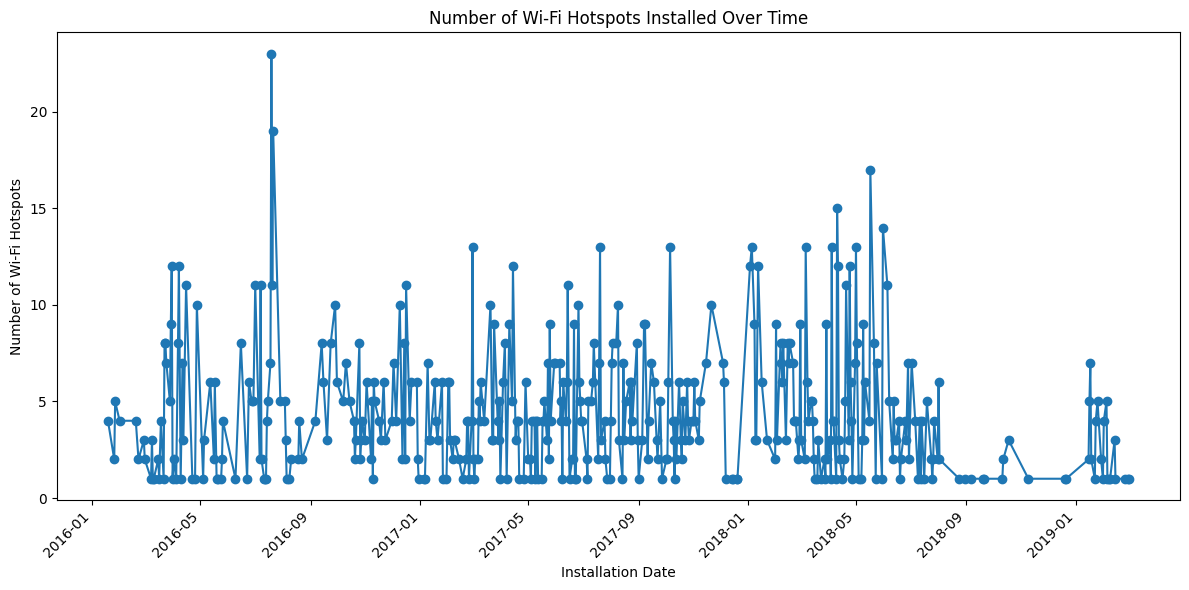

In [40]:

# Load the CSV file into a DataFrame
df = pd.read_csv("NYC_Wi-Fi_Hotspot_Locations_20240318.csv")

# Count the number of Wi-Fi hotspots in each Borough
borough_counts = df['Borough Name'].value_counts()


# 1. Provider vs. City (Clustered Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Borough Name', hue='Provider')
plt.title('Number of Wi-Fi Hotspots by Provider and Borough')
plt.xlabel('Borough Name')
plt.ylabel('Number of Wi-Fi Hotspots')
plt.xticks(rotation=45)
plt.legend(title='Provider')
plt.tight_layout()
plt.show()

# 2. Location Type vs. Borough (Grouped Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Borough Name', hue='Location_T')
plt.title('Number of Wi-Fi Hotspots by Location Type and Borough')
plt.xlabel('Borough Name')
plt.ylabel('Number of Wi-Fi Hotspots')
plt.xticks(rotation=45)
plt.legend(title='Location Type')
plt.tight_layout()
plt.show()

# 3 Plotting the number of Wi-Fi hotspots in each Borough using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Wi-Fi Hotspots in Each Borough (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 4 Plotting the distribution of Wi-Fi hotspots by type of wifi using a bar chart
plt.figure(figsize=(10, 6))
type_counts = df['Type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Distribution of Wi-Fi Hotspots by Type of Wifi (Bar Chart)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5 Plotting the distribution of Wi-Fi hotspots by provider
plt.figure(figsize=(10, 6))
sns.countplot(x='Provider', data=df)
plt.title('Distribution of Wi-Fi Hotspots by Provider')
plt.xlabel('Provider')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 6 Installation Date (Line Plot)
plt.figure(figsize=(12, 6))
df['Activated'] = pd.to_datetime(df['Activated'], format='%m/%d/%Y', errors='coerce')
installation_counts = df['Activated'].value_counts().sort_index()
installation_counts.plot(kind='line', marker='o')
plt.title('Number of Wi-Fi Hotspots Installed Over Time')
plt.xlabel('Installation Date')
plt.ylabel('Number of Wi-Fi Hotspots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#7  the borough with the least number of Wi-Fi providers and their locations

# Create a Folium map centered around New York City
nyc_map_least_number = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Define a list of boroughs
boroughs = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

# Iterate over each borough
for borough in boroughs:
    # Filter data for the current borough
    filtered_df = df[df['Borough Name'] == borough]
    
    # If the filtered DataFrame is not empty
    if not filtered_df.empty:
        # Group data by provider and count unique Wi-Fi providers
        provider_counts = filtered_df['Provider'].value_counts()
        
        # Find the least common Wi-Fi provider
        least_common_provider = provider_counts.idxmin()
        
        # Filter data for the least common provider
        filtered_df = filtered_df[filtered_df['Provider'] == least_common_provider]
        
        # Add markers for each Wi-Fi hotspot location in the filtered DataFrame
        for index, row in filtered_df.iterrows():
            folium.Marker([row['Latitude'], row['Longitude']], popup=row['Provider']).add_to(nyc_map_least_number)

# Save the map as an HTML file
nyc_map_least_number.save("boroughs_least_wifi_providers_locations.html")


# 8  the borough with the Wi-Fi providers and their locations


nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add markers for each Wi-Fi hotspot location
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(nyc_map)

# Display the map
nyc_map.save("wifi_hotspots_map.html")